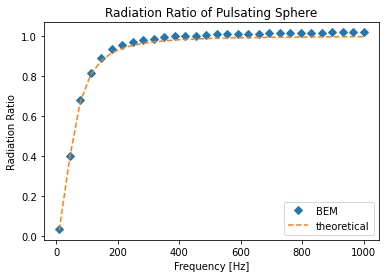

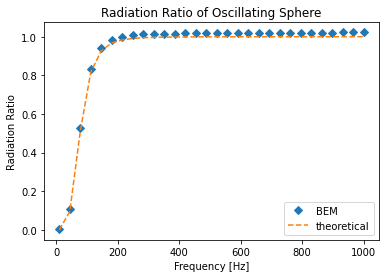

CPU times: user 25.3 s, sys: 21.6 s, total: 47 s
Wall time: 6.94 s


In [1]:
%%time
import abem as ab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def display_graph(example, frequencies, bem_ratios, theoretical_ratios):
    plt.title('Radiation Ratio of ' + example + ' Sphere')
    line_bem, = plt.plot(frequencies, bem_ratios, 'D', label='BEM')
    line_theo, = plt.plot(frequencies, theoretical_ratios, '--', label='theoretical')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Radiation Ratio')
    plt.legend(handles=[line_bem, line_theo], loc='lower right')
    plt.show()

num_samples = 30

solver = ab.ExteriorHelmholtzSolverRAD(ab.sphere_rad())

# Test Problem 1 - Pulsating Sphere
# Neumann condition with v perpendicular to the surface, and
# homogeneous over the full shpere. The the graph plotted also 
# contains the theoretical/closed-form solution.
boundary_condition = solver.neumann_boundary_condition()
boundary_condition.f.fill(1.0)

boundary_incidence = ab.BoundaryIncidence(solver.len())
boundary_incidence.phi.fill(0.0)
boundary_incidence.v.fill(0.0)

frequencies = np.linspace(10, 1000, num_samples, dtype=np.float32)
numerical_radiation_ratios = np.empty(frequencies.size, dtype=np.float32)
theoretical_radiation_ratios = np.empty(frequencies.size, dtype=np.float32)

for i in range(frequencies.size):
    k = ab.frequency_to_wavenumber(frequencies[i])
    boundary_solution = solver.solve_boundary(k, boundary_condition, boundary_incidence)
    numerical_radiation_ratios[i] = boundary_solution.radiation_ratio()
    theoretical_radiation_ratios[i] = k**2 / (k**2+1)

display_graph('Pulsating', frequencies, numerical_radiation_ratios, theoretical_radiation_ratios)

# Test Problem 2 - Osillating Sphere
# Neumann condition with sphere oscillating along the z-axix. This
# results in a v(x) = z, where z is the z component of a given 
# point x on the sphere.
for i in range(boundary_condition.f.size):
    boundary_condition.f[i] = solver.centers[i, 1]
for i in range(frequencies.size):
    k = ab.frequency_to_wavenumber(frequencies[i])
    boundary_solution = solver.solve_boundary(k, boundary_condition, boundary_incidence)
    numerical_radiation_ratios[i] = boundary_solution.radiation_ratio()
    theoretical_radiation_ratios[i] = k**4 / (k**4+4)

display_graph('Oscillating', frequencies, numerical_radiation_ratios, theoretical_radiation_ratios)
